# ASSIGNMENT 5

In [ ]:
submitted by
Sri Subhash Penneru
student id - 202292880

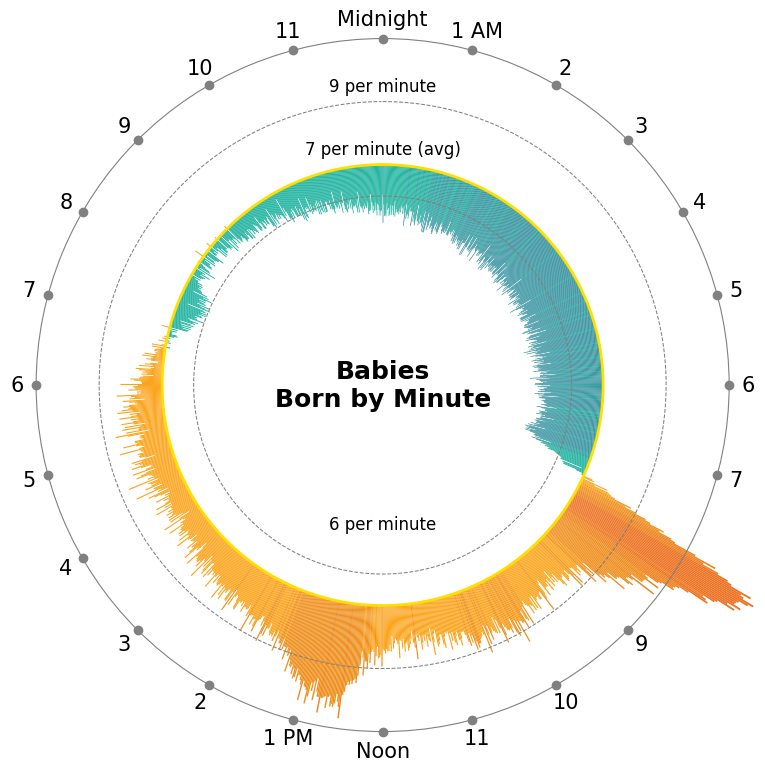

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
births_df = pd.read_csv('births.csv')
births_df['minute_of_day'] = births_df['time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
births_per_minute = births_df.groupby('minute_of_day').size().reindex(np.arange(0, 1440), fill_value=0)
average_births = births_per_minute.mean()
desired_avg = 7
scale_factor = desired_avg / average_births
adjusted_births_per_minute = births_per_minute * scale_factor

# Define color gradients
colors_below_avg = ['#17b09c', '#318f9d', '#2d7aa2', '#226192', '#094e81']
colors_above_avg = ['#fba41b', '#ef901e', '#ee8320', '#ec7323', '#e66024', '#db4f28', '#d03d26', '#be3326', '#ad2a24', '#9b1e1f', '#8d181b', '#7b1515']

# Function to determine color
def get_color(value, avg):
    deviation = (value - avg) / avg
    steps = int(abs(deviation) / 0.25)
    if value >= avg:
        color_index = min(steps, len(colors_above_avg) - 1)
        return colors_above_avg[color_index]
    else:
        color_index = min(steps, len(colors_below_avg) - 1)
        return colors_below_avg[color_index]

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))
theta = np.linspace(0, 2 * np.pi, 1440, endpoint=False)
width = 2 * np.pi / 1440

for i in range(1440):
    birth_count = adjusted_births_per_minute[i]
    bottom = desired_avg if birth_count >= desired_avg else birth_count
    height = abs(birth_count - desired_avg)
    color = get_color(birth_count, desired_avg)
    ax.bar(theta[i], height, width=width, bottom=bottom, color=color, align='edge', clip_on=False)

# Add the average line and remaining plot customization
ax.plot(theta, [desired_avg] * 1440, color='#ffde00', linewidth=2, )

ax.set_theta_zero_location('N')  
ax.set_theta_direction(-1)  

# Set the 24-hour clock labels around the graph
clock_labels = ['Midnight', '1 AM', '2', '3', '4', '5', '6', '7', ' ', '9', '10', '11', 'Noon', '1 PM', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
clock_angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)
ax.set_xticks(clock_angles)
ax.set_xticklabels(clock_labels, fontsize=15)

# Add dotted line circles for 6 and 9 births per minute
for r in [6, 9]:
    ax.plot(theta, [r] * 1440, color='grey', linestyle='dashed', linewidth=0.75, clip_on=False)

ax.spines['polar'].set_visible(True)
ax.spines['polar'].set_color('grey')

i=0
# Add dot points at the labels
for angle in clock_angles:
    i=i+1
    if(i==9):
        continue
    ax.plot(angle, desired_avg + 4, 'o', color='grey',clip_on=False)

# Hide the original radial tick labels and grid
ax.set_yticklabels([])
ax.grid(False)

# Adjust the outer circle with axis to grey and expand the radial limit
ax.set_rmax(desired_avg + 4)

# Add annotation for 'Babies Born by Minute' in the center
ax.text(0, 0, 'Babies\nBorn by Minute', horizontalalignment='center',
        verticalalignment='center', fontsize=18, fontweight='bold', color='black')

# Add labels for 6, 7 (average), and 9 births per minute
plt.text(0.5, 0.3, '6 per minute', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black', transform=ax.transAxes)
ax.text(0, 7.5, '7 per minute (avg)', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
ax.text(0, 9.5, '9 per minute', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

# Show the plot
plt.show()


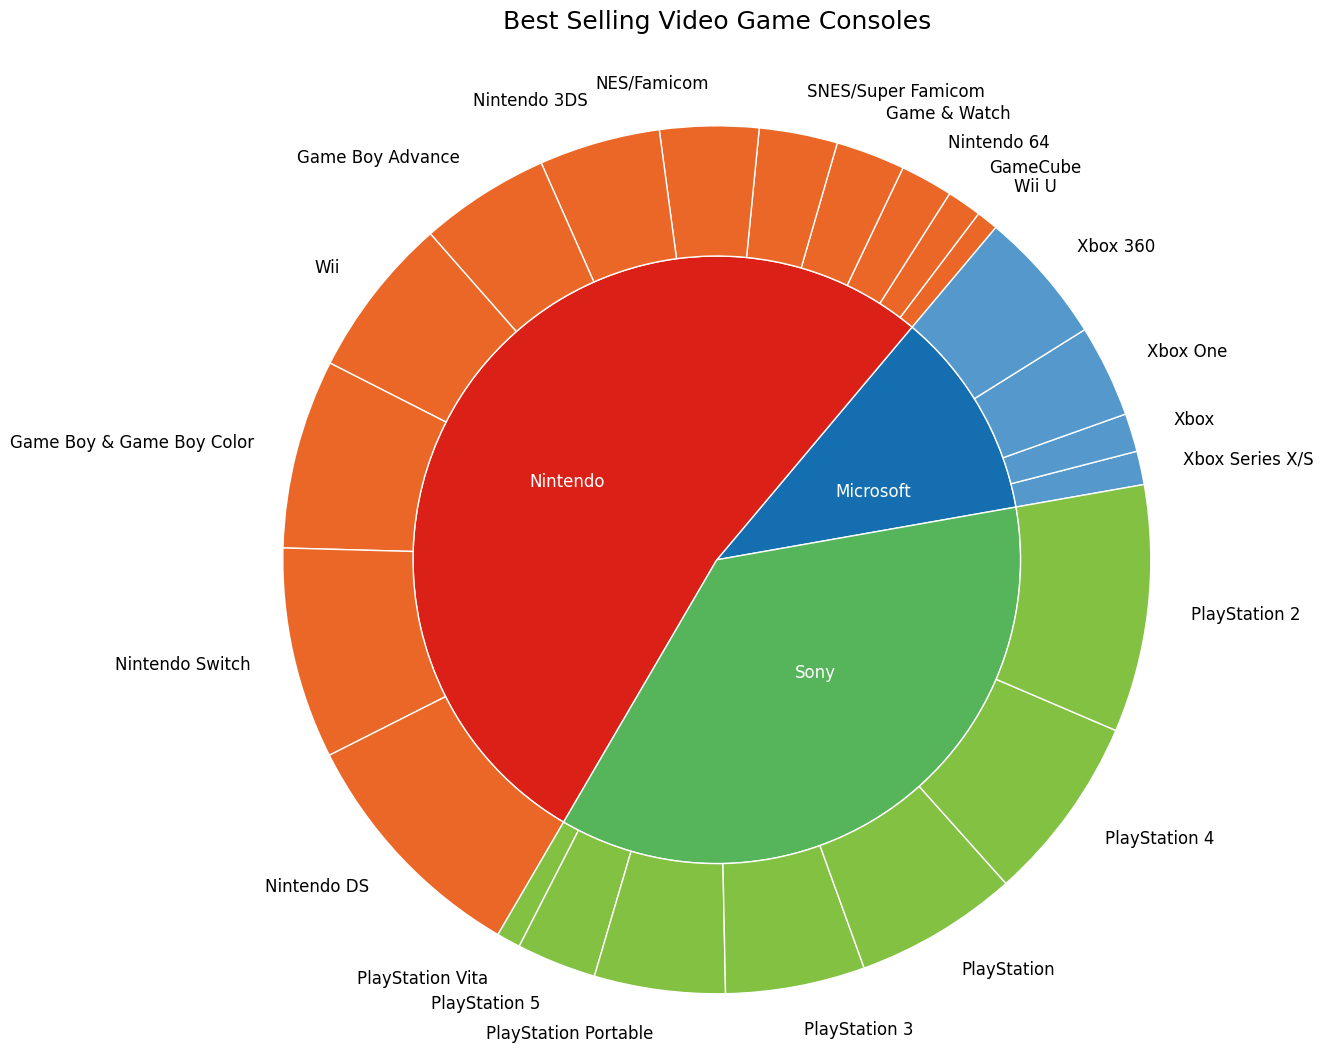

In [165]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('consoles.csv')

# Sort the data by 'Company' and 'Units sold' in descending order
data_sorted = data.sort_values(['Company','Units sold'], ascending=[True,True] )

# Filter out the 4 consoles with the smallest units sold for Nintendo
nintendo_least_sold = data_sorted[data_sorted['Company'] == 'Nintendo'].head(4)

data_filtered = data_sorted.drop(nintendo_least_sold.index)

# Aggregate the total units sold by company for the inner ring
grouped_data = data_filtered.groupby('Company')['Units sold'].sum().reindex(['Microsoft', 'Nintendo', 'Sony'])
group_size = grouped_data.values.tolist()
group_labels = grouped_data.index.tolist()

# Prepare the data for the outer ring
outer_ring_data = data_filtered[['Company', 'Platform', 'Units sold']]
outer_ring_data = outer_ring_data.assign(Color=outer_ring_data['Company'].map({'Microsoft': '#5599cc', 'Nintendo': '#ea6727', 'Sony': '#83c143'}))

# Outer ring - Consoles
console_labels = outer_ring_data['Platform'].tolist()
console_sizes = outer_ring_data['Units sold'].tolist()
outer_colors = outer_ring_data['Color'].tolist()

# Create a larger figure to make names clearer
plt.figure(figsize=(14, 12))


ax = plt.subplot(111)


ax.axis('equal')  

# Inner ring
wedges, texts = ax.pie(group_size, labels=group_labels, colors=['#156eaf', '#db2018', '#56b45b'], startangle=10,
                       radius=1-0.3, wedgeprops=dict(width=0.7, edgecolor='w'), textprops=dict(color='white',size='12'), labeldistance=0.45)

# Outer ring
wedges2, texts2 = ax.pie(console_sizes, labels=console_labels, colors=outer_colors, startangle=10,
                         radius=1, wedgeprops=dict(width=0.3, edgecolor='w'), labeldistance=1.1, textprops=dict(size='12'))

plt.title("Best Selling Video Game Consoles", fontsize=18,pad=50)

# Show the plot
plt.show()
